<a href="https://colab.research.google.com/github/bingsen-wang/EE-Fundamentals/blob/main/UniformPlaneWave_freeSpace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Uniform Plane Waves</h1></b>

Dr. Bingsen Wang

4/2/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
0


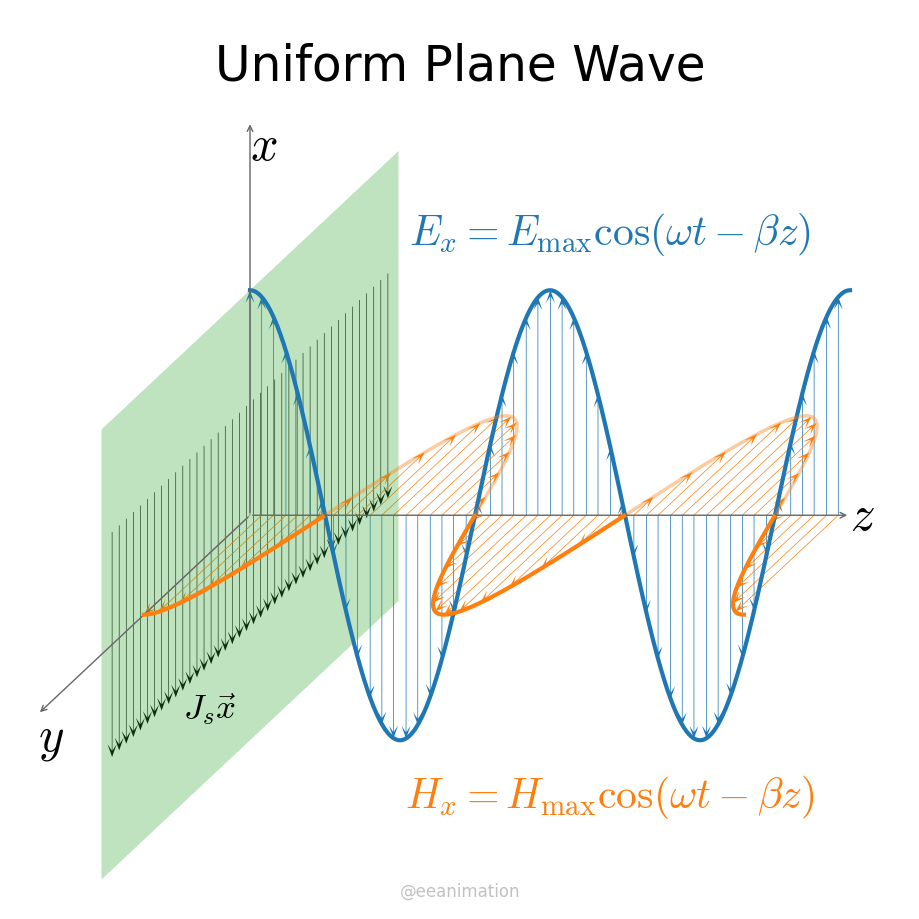

In [110]:
from matplotlib import pyplot,animation,cm,patches,path
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def d32(xyz):
  theta=np.pi/4
  x=xyz[2]-xyz[1]*np.sin(theta)/2
  y=xyz[0]-xyz[1]*np.cos(theta)/2
  return np.array([x,y])

Js0=.4
Nf=720
Nstem=50 #number of stem lines
beta=np.pi*4
omega=np.pi*2
ylst = np.linspace(.65,-.65,40)
t=np.linspace(0,2,Nf)
z=np.linspace(0,1,Nf)
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xlim=[-.4,1.1];ylim=[-.7,.9]
ax1 = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim); ax1.axis('off')
ax = fig.add_axes([0,0,1,1],xlim=xlim,ylim=ylim,fc='none'); ax.axis('off')
ax.text(np.sum(xlim)/2,ylim[1]-.1, 'Uniform Plane Wave', size=35,ha='center',va='center')
pmax=[d32((.7,0,0)),d32((0,1,0)),d32((0,0,1))]
pmin=[d32((0,0,0)),d32((0,0,0)),d32((0,0,0))]
[ax.annotate('',pmax[k],pmin[k],arrowprops=dict(arrowstyle='->',lw=1,color='.4')) for k in range(3)] #x,y,z-axis
[ax.text(pmax[k][0],pmax[k][1],[r'$x$','$y$',r'$z$'][k],
         size=35,va=['top','top','center'][k],ha=['left','left','left'][k]) for k in range(3)]
ax.text(.6,.5,r'$E_x=E_{\text{max}}\cos(\omega t-\beta z)$',c=cl[0],size=30,ha='center',va='center')
ax.text(.6,-.5,r'$H_x=H_{\text{max}}\cos(\omega t-\beta z)$',c=cl[1],size=30,ha='center',va='center')
lines = [ax.plot([],[],c=cl[k],lw=3,zorder=k+2)[0] for k in range(2)]
lines +=[ax.plot([],[],c=cl[1],lw=2.5,alpha=.4)[0]]
lines +=[ax.plot([],[],c=cl[0],lw=1.5)[0] for k in range (20)] #stem lines for Ex
x,y=0.4,.7
verts=[d32([x,y,0]),d32([-x,y,0]),d32([-x,-y,0]),d32([x,-y,0])]+[(0,0)] #x-y plane at z=0
codes=[path.Path.MOVETO]+[path.Path.LINETO]*3 + [path.Path.CLOSEPOLY]
ax.add_patch(patches.PathPatch(path.Path(verts,codes),ec='none',fc=cl[2],lw=2,joinstyle='round',alpha=.3,zorder=-3))
txt_Js=ax.text(0,0,r'$J_s\vec x$',size=25)
def animate(i):
  # i=Nf//2
  if i%50==0:
    print(i)
  ax1.clear(); ax1.set_xlim(xlim);ax1.set_ylim(ylim);ax1.axis('off')
  Jsx=d32([Js0/2*np.cos(omega*t[i])+0*ylst,ylst,ylst*0])
  Ex=d32((.4*np.cos(omega*t[i]-beta*z),0*z,z))
  Ey=d32((0*z,.5*np.cos(omega*t[i]-beta*z),z))
  Ey0=d32((0*z,0*z,z))
  lines[0].set_data(Ex[0],Ex[1])
  lines[1].set_data(Ey[0],np.ma.masked_where(Ey[1]>=0,Ey[1]))
  lines[2].set_data(Ey[0],np.ma.masked_where(Ey[1]<=0,Ey[1]))
  [ax1.add_patch(patches.FancyArrow(Ex[0,k*Nf//Nstem],0,0,Ex[1,k*Nf//Nstem],width=.0012,length_includes_head=True,
                                    head_width=.015,overhang=.5,ec='none',fc=cl[0],alpha=1)) for k in range (Nstem)]
  [ax1.add_patch(patches.FancyArrow(z[k*Nf//Nstem],0,Ey[0,k*Nf//Nstem]-z[k*Nf//Nstem],Ey[1,k*Nf//Nstem],width=.0012,length_includes_head=True,
                                    head_width=.015,overhang=.5,ec='none',fc=cl[1],alpha=1)) for k in range (Nstem)]
  [ax1.add_patch(patches.FancyArrow(Jsx[0,k],Jsx[1,k],0,-Js0*np.cos(omega*t[i]),width=.001,length_includes_head=True,
                                    head_width=.015,overhang=.5,ec='none',fc='k',alpha=1,zorder=-3)) for k in range (len(Jsx[0,:]))]
  txt_Js.set_position((Jsx[0,10],Jsx[1,10]-Js0*np.cos(omega*t[i])))
  if np.cos(omega*t[i])>0:
    txt_Js.set_va('top');txt_Js.set_ha('left')
  else:
    txt_Js.set_va('bottom');txt_Js.set_ha('right')
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("planewave.mp4",writer=animation.FFMpegWriter(fps=60),dpi=200)